# Slab Detachment Benchmark

version 0.1 Romain Beucher romain.beucher@anu.edu.au

In [1]:
import UWGeodynamics as GEO
from UWGeodynamics import visualisation as vis

loaded rc file /home/jovyan/UWGeodynamics/UWGeodynamics/uwgeo-data/uwgeodynamicsrc


In [2]:
u = GEO.UnitRegistry

In [3]:
half_rate = 1.8 * u.centimeter / u.year
model_length = 660. * u.kilometer
model_width = 1000. * u.kilometer
surfaceTemp = 273.15 * u.degK
baseModelTemp = 1603.15 * u.degK
bodyforce = 3300 * u.kilogram / u.metre**3 * 9.81 * u.meter / u.second**2

KL = model_length
Kt = KL / half_rate
KM = bodyforce * KL**2 * Kt**2
KT = (baseModelTemp - surfaceTemp)

GEO.scaling_coefficients["[length]"] = KL
GEO.scaling_coefficients["[time]"] = Kt
GEO.scaling_coefficients["[mass]"]= KM
GEO.scaling_coefficients["[temperature]"] = KT

In [4]:
Model = GEO.Model(elementRes=(64, 64), 
                  minCoord=(-500. * u.kilometer, -660. * u.kilometer), 
                  maxCoord=(500. * u.kilometer, 0. * u.kilometer), 
                  gravity=(0.0, -9.81 * u.meter / u.second**2))

In [5]:
Model.minViscosity = 1e21 * u.pascal * u.second
Model.maxViscosity = 1e25 * u.pascal * u.second

In [6]:
polygon = GEO.shapes.Polygon([(-500. * u.kilometer, 0. * u.kilometer),
                              (-500. * u.kilometer, -80. * u.kilometer),
                              (-40. * u.kilometer, -80. * u.kilometer),
                              (-40. * u.kilometer, -330. * u.kilometer),
                              (40. * u.kilometer, -330. * u.kilometer),
                              (40. * u.kilometer, -80. * u.kilometer),
                              (500. * u.kilometer, -80. * u.kilometer),
                              (500. * u.kilometer, 0. * u.kilometer)])

In [7]:
Mantle = Model.add_material(name="Mantle", shape=GEO.shapes.Layer(top=Model.top, bottom=Model.bottom))
Lithosphere = Model.add_material(name="Lithosphere", shape=polygon)

In [8]:
Mantle.density = 3150. * u.kilogram / u.metre**3
Lithosphere.density = 3300. * u.kilogram / u.metre**3

In [9]:
Mantle.viscosity = GEO.ViscousCreep(preExponentialFactor=5.0e-22 * u.pascal**-1 * u.second**-1, 
                                    stressExponent=1, 
                                    activationVolume=0.0,
                                    activationEnergy=0.0)

Lithosphere.viscosity = GEO.ViscousCreep(preExponentialFactor=1.23e-48 * u.pascal**-4 * u.second**-1, 
                                         stressExponent=4, 
                                         activationVolume=0.0,
                                         activationEnergy=0.0)


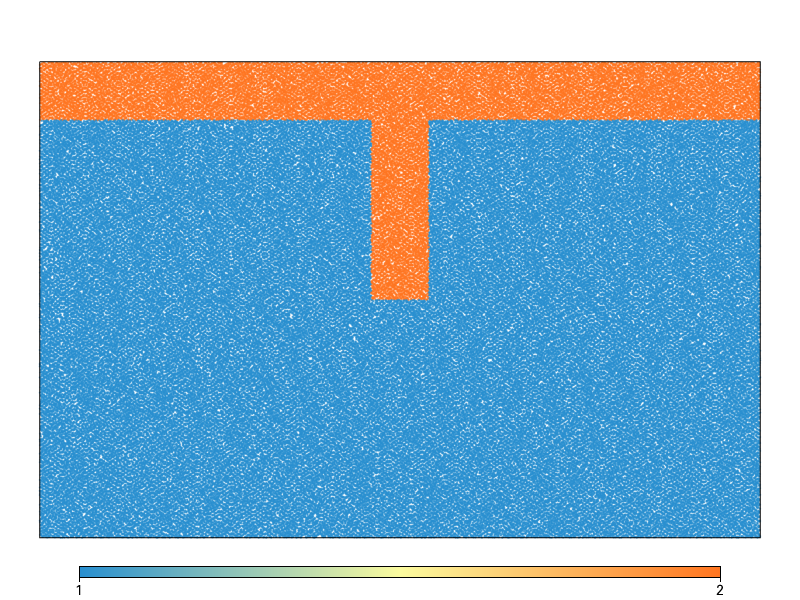

In [10]:
Fig = vis.Figure(figsize=(800,600))
Fig.Points(Model.swarm, Model.materialField, fn_size=3)
Fig.show()

In [17]:
import numpy as np

npoints = 10

y = np.linspace(GEO.nd(-330. * u.kilometer), GEO.nd(-80. * u.kilometer), npoints)

coords = np.ndarray((npoints, 2))

coords[:, 0] = GEO.nd(-40 * u.km)
coords[:, 1] = y
left_tracers = Model.add_passive_tracers(name="left tracers", vertices=coords)

coords[:, 0] = GEO.nd(40 * u.km)
right_tracers = Model.add_passive_tracers(name="right tracers", vertices=coords)


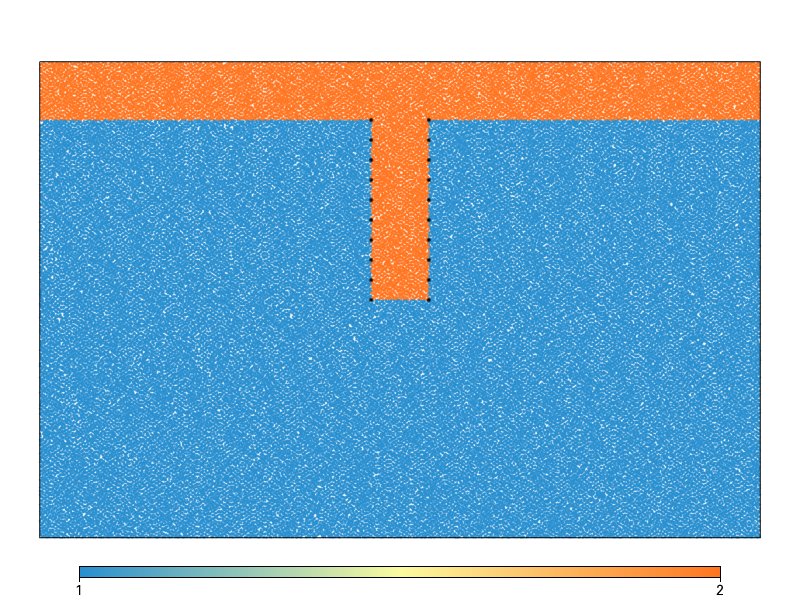

In [18]:
Fig = vis.Figure(figsize=(800,600))
Fig.Points(left_tracers, pointSize=5.0)
Fig.Points(right_tracers, pointSize=5.0)
Fig.Points(Model.swarm, Model.materialField, fn_size=3.0)
Fig.show()

In [17]:
Model.set_velocityBCs(left=[0., 0.], right=[0., 0.], bottom=[None, 0.], top=[None, 0.])

In [18]:
Model.init_model()


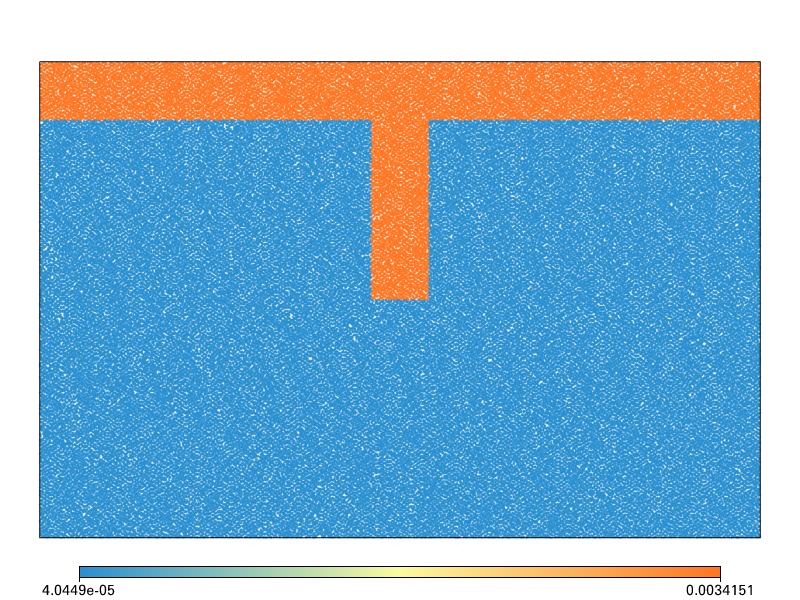

In [19]:
Fig = vis.Figure(figsize=(800,600))
Fig.Points(Model.swarm, Model.viscosityField, fn_size=3.0)
Fig.show()

In [20]:
Model.solver.set_inner_method("mumps")
Model.solver.set_penalty(1e6)
GEO.rcParams["nonlinear.tolerance"] = 1e-5
GEO.rcParams["nonlinear.max.iterations"] = 50

In [15]:
Model.run_for(nstep=1)

Step:1 Model Time:  1.0 megayear dt: 1.0 megayear (2018-06-14 05:32:59)
Step:2 Model Time:  2.0 megayear dt: 1.0 megayear (2018-06-14 05:33:02)
Step:3 Model Time:  3.0 megayear dt: 1.0 megayear (2018-06-14 05:33:04)
Step:4 Model Time:  4.0 megayear dt: 1.0 megayear (2018-06-14 05:33:08)
Step:5 Model Time:  5.0 megayear dt: 1.0 megayear (2018-06-14 05:33:11)
Step:6 Model Time:  6.0 megayear dt: 1.0 megayear (2018-06-14 05:33:14)
Step:7 Model Time:  6.96990538404 megayear dt: 0.969905384044 megayear (2018-06-14 05:33:16)
Step:8 Model Time:  7.0 megayear dt: 0.030094615956 megayear (2018-06-14 05:33:18)
Step:9 Model Time:  7.94699583585 megayear dt: 0.946995835847 megayear (2018-06-14 05:33:19)
Step:10 Model Time:  8.0 megayear dt: 0.0530041641526 megayear (2018-06-14 05:33:22)
Step:11 Model Time:  8.83128924743 megayear dt: 0.831289247431 megayear (2018-06-14 05:33:24)
Step:12 Model Time:  9.0 megayear dt: 0.168710752569 megayear (2018-06-14 05:33:27)
Step:13 Model Time:  9.7490473083 me

Step:91 Model Time:  21.9951704796 megayear dt: 0.0604043237122 megayear (2018-06-14 05:36:05)
Step:92 Model Time:  22.0 megayear dt: 0.00482952037897 megayear (2018-06-14 05:36:08)
Step:93 Model Time:  22.0604914941 megayear dt: 0.0604914941355 megayear (2018-06-14 05:36:10)
Step:94 Model Time:  22.1209493891 megayear dt: 0.0604578949851 megayear (2018-06-14 05:36:12)
Step:95 Model Time:  22.1820329158 megayear dt: 0.061083526679 megayear (2018-06-14 05:36:13)
Step:96 Model Time:  22.243007742 megayear dt: 0.0609748261731 megayear (2018-06-14 05:36:15)
Step:97 Model Time:  22.3037319588 megayear dt: 0.0607242168606 megayear (2018-06-14 05:36:18)
Step:98 Model Time:  22.3649619404 megayear dt: 0.0612299815494 megayear (2018-06-14 05:36:20)
Step:99 Model Time:  22.4263771086 megayear dt: 0.0614151681897 megayear (2018-06-14 05:36:22)
Step:100 Model Time:  22.4878299138 megayear dt: 0.0614528052626 megayear (2018-06-14 05:36:24)
Step:101 Model Time:  22.5492913752 megayear dt: 0.06146146

1


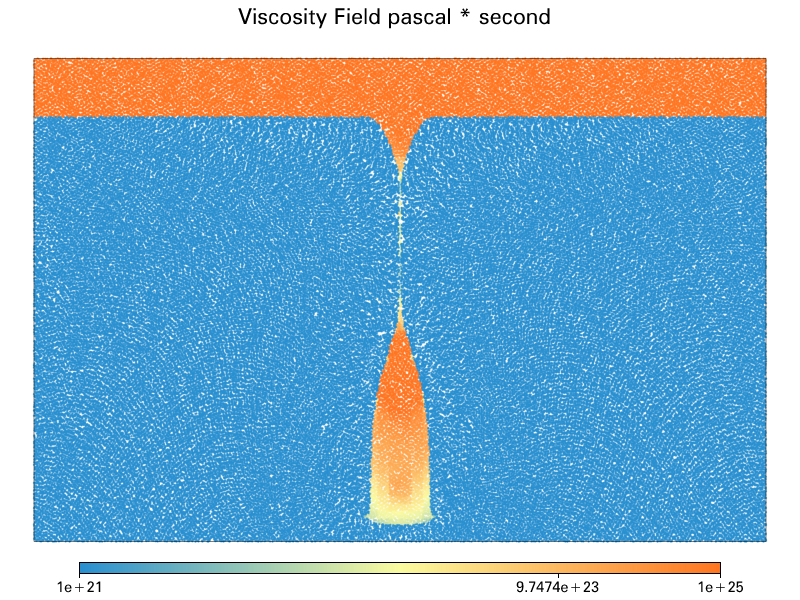

In [16]:
Fig = vis.Figure(figsize=(800,600))
Fig.Points(Model.swarm, Model.viscosityField, fn_size=3.0)
Fig.show()